In [1]:
# This script aims to debug the NEW (array-level) operation of 
# phase_reconstruction_2, i.e.: phase accumulation model. The choice of 
# trace is given by an explicit path.

# . Honours Module Folder
# ├ FYPLibrary
# | ├ file_reading.py
# | └ IQ_demod.py
# └ Sub Project folder
#   └ this script(.py)

# Initialization: Directory appending for my system. Vary the directories as necessary.
import sys
import os.path as path
# Add the FYPLibrary folder in the parent level of this folder.
if path.join(path.dirname(path.abspath('')), 'FYPLibrary') not in sys.path:
    sys.path.append(path.join(path.dirname(path.abspath('')), 'FYPLibrary'))

# from pprint import pprint
# pprint(sys.path)

# Import Modules
from os import listdir
from file_reading import *
from IQ_demod import *
import numpy as np
import matplotlib.pyplot as plt
# from EPstandard import easy_read_popt_pcov
# from scipy import optimize
# from matplotlib.ticker import AutoMinorLocator



In [2]:

folderpath = r'D:\NUS\Semester 7\PC4199 Honours Project\20211215 phase reconstruction experimental\traces'
for i, f in enumerate(files:= listdir(path= folderpath)):
    print(f"{i:>3}: {f}")
# my_input = int(input("Please specify which file you would like to generate a periodogram of: "))
my_input = 3
NAME = files[my_input]
TXT_FILE_PATH = file_str_to_path(NAME, dir=folderpath)
print(f"{TXT_FILE_PATH = }")

SIGNAL_F = 80.125e6 *2
SAMPLING_F = 1e6
N, _ = freq_ratio(signal= SIGNAL_F, sample= SAMPLING_F)

print(f"{N = }")

meta, trace = parse_and_read_oscilliscope_txt(TXT_FILE_PATH)
signal = signal_from_trace(np.asarray(trace))

  0: C1-004Hz-020.2mVpp-80.125000MHz-OneAmp00002.txt
  1: C1-004Hz-020.4mVpp-80.125000MHz-OneAmp00001.txt
  2: C1-122Hz-020mVpp-80.125000MHz-OneAmp00001.txt
  3: C2-000Hz-000mVpp-80.1250448MHz00004.txt
  4: C2-000Hz-000mVpp-80.1250448MHz00005.txt
  5: C2-ball-drop-00002.txt
TXT_FILE_PATH = 'D:\\NUS\\Semester 7\\PC4199 Honours Project\\20211215 phase reconstruction experimental\\traces\\C2-000Hz-000mVpp-80.1250448MHz00004.txt'
N = 4
[Notice] Ignore the following mixed types warning.


In [4]:
phasesORIG = signal_to_phase(signal, N, 2*pi/N, phase_advancement_correction= False)


In [5]:
phases1 = phase_reconstruction_2(phasesORIG, phase_advance= 2*pi/N)


In [ ]:
phases2 = phase_reconstruction_2_one(phasesORIG, phase_advance= 2*pi/N)


In [ ]:
phases3 = phase_reconstruction_2_two(phasesORIG, phase_advance= 2*pi/N)


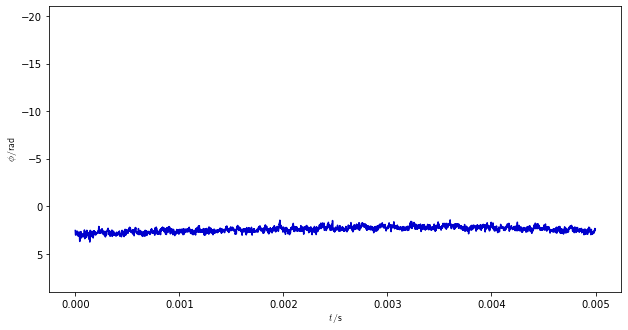

In [6]:
t_axis = np.arange(start= 0, 
    stop= (int(meta["Record Length"][0])-N) * meta['Sample Interval'][0],
    step= meta['Sample Interval'][0])

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(t_axis, phases1, color = 'mediumblue')
ax.set_ylabel(r'$\phi$/rad', useTex = True)
ax.set_xlabel(r'$t$/s', useTex = True)
fig.set_size_inches(11.75-1.5, 8.25-2 - 1)
ax.set_ylim([9, -21])
plt.show(block= True)